## K-Nearest Neighbor


Used to classify data points based on "distance" to known data. Find the K nearest neighbors, based on a distance metric and let them sort the classification.

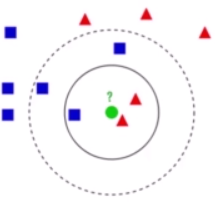

We want it to be small so we don't have to go too far, but big enough that there's enough data points to get a meaningful sample.

It's still supervised learning, because labelling is still needed. 

In [4]:
import pandas as pd
import numpy as np
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('Aquivos_de_Código/u.data', sep='\t', names=r_cols, usecols=range(3))
ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [5]:
movieProperties = ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [6]:
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
1,450
2,129
3,88
4,207
5,84


In [7]:
movieDict = {}
with open(r'Aquivos_de_Código/u.item', encoding='latin1') as f:
    temp = ''
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = list(map(int, genres))
        movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'), movieProperties.loc[movieID].rating)


Measure of popularity for each movie.

Open u.item, and extracts the movie information, mapping movieID to the rating

Checar erro UnicodeDecodeError                        Traceback (most recent call last)

In [8]:
from scipy import spatial

def computeDistance(a,b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance
computeDistance(movieDict[2], movieDict[4])


    

78.66666666666667

In [9]:
from scipy import spatial

def computeDistance(a,b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance
computeDistance(movieDict[2], movieDict[4])


    

78.66666666666667

In [10]:
import operator

def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = computeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors
K = 10
avgRating = 0
neighbors = getNeighbors(1,K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(str(movieDict[neighbor]) + " " + str(movieDict[neighbor][3]))
avgRating /= float(K)

('Air Force One (1997)', [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 429, size    431.00000
mean      3.63109
Name: 300, dtype: float64) size    431.00000
mean      3.63109
Name: 300, dtype: float64
('Independence Day (ID4) (1996)', [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], 427, size    429.000000
mean      3.438228
Name: 121, dtype: float64) size    429.000000
mean      3.438228
Name: 121, dtype: float64
('Scream (1996)', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 476, size    478.000000
mean      3.441423
Name: 288, dtype: float64) size    478.000000
mean      3.441423
Name: 288, dtype: float64
('English Patient, The (1996)', [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 479, size    481.000000
mean      3.656965
Name: 286, dtype: float64) size    481.000000
mean      3.656965
Name: 286, dtype: float64
('Raiders of the Lost Ark (1981)', [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 418, size    420.000000
mean 

Increasing K in K-nearest neighbors decreases variance and increases bias.